## Assignment 3 - Dimensionality Reduction

This assignment is based on content discussed in module 6 and will work with the famous MNIST dataset, which is a set of images of handwritten digits https://en.wikipedia.org/wiki/MNIST_database.
The dataset has been provided to you in a .csv file.

## Learning outcomes

- Apply a Random Forest classification algorithm to MNIST dataset
- Perform dimensionality reduction of features using PCA and compare classification on the reduced dataset to that of original one
- Apply dimensionality reduction techniques: t-SNE and LLE

## Questions (15 points total)

__Question 1 (1 point).__ Load the MNIST dataset and split it into a training set and a test set (take the first 60,000 instances for training, and the remaining 10,000 for testing).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import joblib

In [3]:
import time

In [4]:
data=pd.read_csv(r'C:\Users\User\Downloads\mnist_dataset.csv')

In [5]:
data.head(5)

,Unnamed: 0,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
data.shape

(70000, 786)

In [7]:
label=data['label']

In [8]:
data=data.drop(['label'], axis=1)

In [9]:
X=data
y=label

In [10]:
train_ratio = 6000/7000
test_ratio = 1000/7000

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1 - train_ratio)

__Question 2 (2 points).__ Train a Random Forest classifier on the dataset and time how long it takes, then evaluate the resulting model on the test set.

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
forest_clf= RandomForestClassifier(random_state= 1)

In [14]:
start = time.time()

X_rfr= forest_clf.fit(X_train,y_train)
end = time.time()

end - start

48.57362723350525

In [15]:
predictions=forest_clf.predict(X_test)

In [16]:
from sklearn import metrics

In [17]:
print('MAE:',metrics.mean_absolute_error(y_test,predictions))
print('MSE:',metrics.mean_squared_error(y_test,predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print('r2_score:',(metrics.r2_score(y_test,predictions)))

MAE: 0.11048895110488952
MSE: 0.5272472752724727
RMSE: 0.7261179485954556
r2_score: 0.9377023573131121


#r2 is good score

__Question 3 (4 points).__ Next, use PCA to reduce the dataset’s dimensionality, with an explained variance ratio of 95%. Train a new Random Forest classifier on the reduced dataset and see how long it takes. Was training much faster? Next evaluate the classifier on the test set: how does it compare to the previous classifier?

In [18]:
import time

In [19]:
from sklearn.decomposition import PCA
pca=PCA(n_components=0.95)
start = time.time()

X_red= pca.fit_transform(X_train)
end = time.time()

end - start

6.80999493598938

__Question 4 (4 points).__ Use t-SNE to reduce the MNIST dataset, show result graphically.

In [20]:
tsne = TSNE(n_components=2, random_state=1)
X_reduced = tsne.fit_transform(X_train)

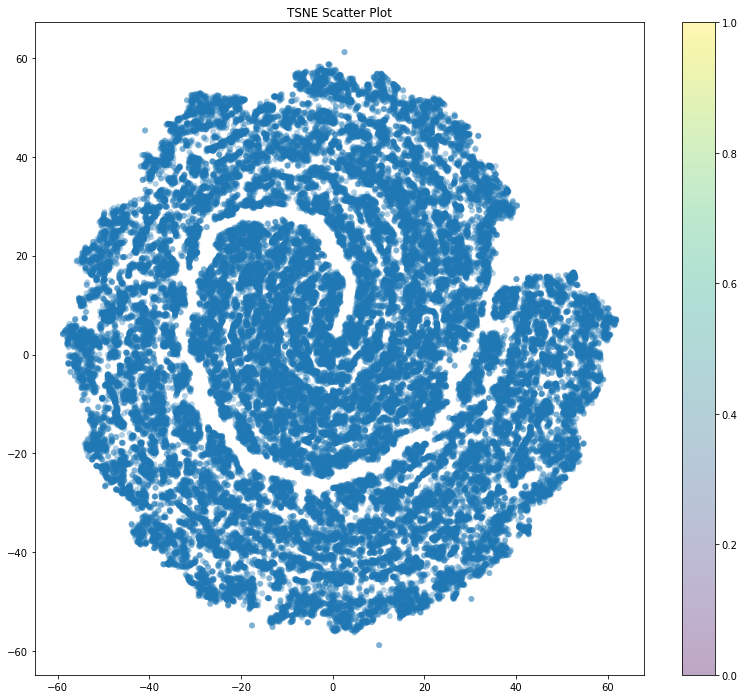

In [21]:
plt.figure(figsize = (30,12))

plt.subplot(122)
plt.scatter(X_reduced[:,0],X_reduced[:,1], 
            cmap = "coolwarm", edgecolor = "None", alpha=0.35)
plt.colorbar()
plt.title('TSNE Scatter Plot')
plt.show()

__Question 5 (4 points).__ Compare with other dimensionality methods: _Locally Linear Embedding_ (LLE) or _Multidimensional scaling_ (MDS).

In [22]:
from sklearn.manifold import LocallyLinearEmbedding
start = time.time()
X_lle = LocallyLinearEmbedding(n_components=0.95).fit_transform(X_train)

end = time.time()

end - start

300.3025302886963

#LLE runs a lot slower than t-SNE